### PROJECT - COMP 603
##### Group 5 (Raihan Reza, Syed Hasan)
##### Dec 15, 2024
##### Project Brief- A dataset on COVID-19 pandemic impact on ABC Company has been provided. Need to analyze the impact of COVID on the customer base for the year 2018-2021.  

In [177]:
####### Import necessary libraries ###########

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
########### Load the CSV file #############
file_path = r"C:\N-Doc\SaskPoly Regina\STH\COMP 603 - Pgm for Data Science\Project\COVID_Parcel_Business.csv"
COVID_df = pd.read_csv(file_path)

print(COVID_df.head())  # Print the first few rows

   FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME
0          718117      2021         1       8
1          718117      2020         7     257
2          718117      2019        39     141
3          718117      2018         1      14
4          718117      2021         2     192


In [179]:
# Clean the dataset: Remove unnecessary rows and columns if exist
COVID_df = COVID_df.dropna(subset=['FakeCustomerID', 'THE_YEAR', 'THE_WEEK', 'VOLUME'])  # Drop rows without essential data
COVID_df = COVID_df[['FakeCustomerID', 'THE_YEAR', 'THE_WEEK', 'VOLUME']]  # Keep relevant columns

# Convert columns to appropriate data types
COVID_df['VOLUME'] = pd.to_numeric(COVID_df['VOLUME'], errors='coerce')
COVID_df['THE_YEAR'] = COVID_df['THE_YEAR'].astype(int)
COVID_df['THE_WEEK'] = COVID_df['THE_WEEK'].astype(int)

### Summarize yearly parcel volume - year wise

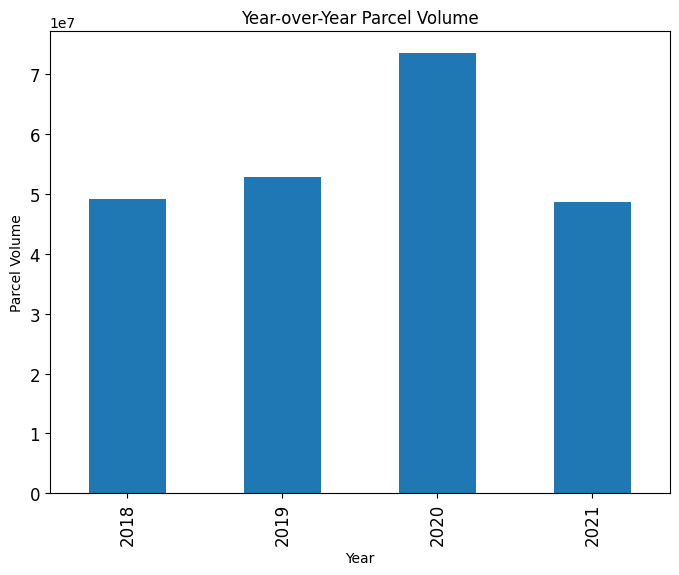

In [180]:
yearly_volume = COVID_df.groupby('THE_YEAR')['VOLUME'].sum()

# Plot year-over-year parcel volume
plt.figure(figsize=(8, 6))
yearly_volume.plot(kind='bar', title='Year-over-Year Parcel Volume')
plt.ylabel('Parcel Volume')
plt.xlabel('Year')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

### Draw the weekly parcel volumes data for year 2019 and 2020 to see the volume impact over time.

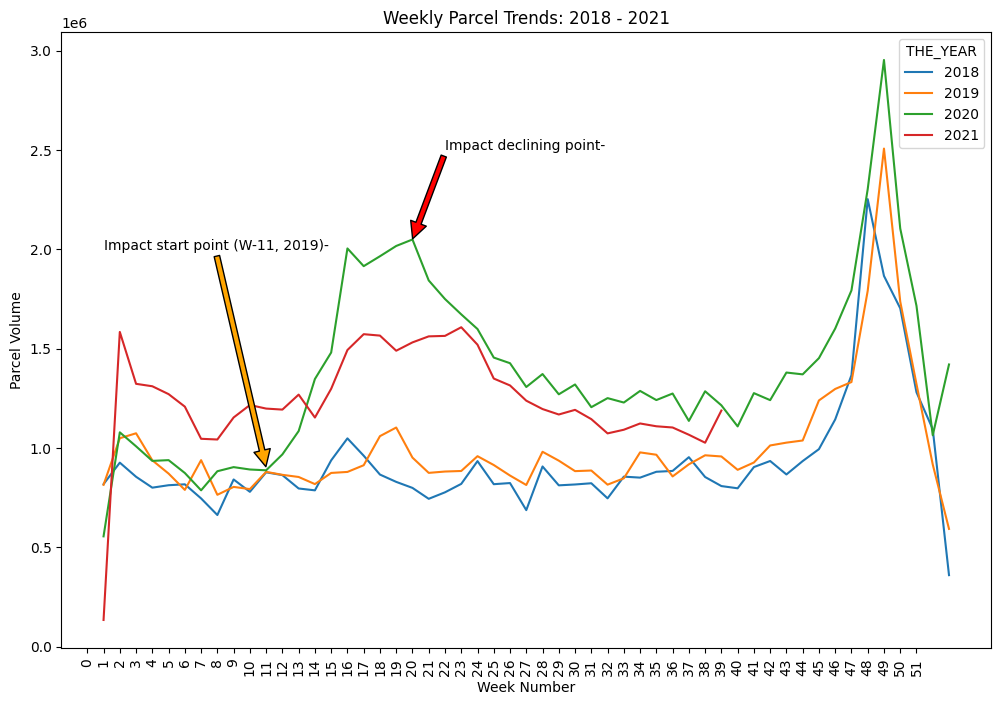

In [181]:
# Weekly trends for 2018 - 2021
weekly_trends = COVID_df[COVID_df['THE_YEAR'].isin([2018, 2019, 2020, 2021])].groupby(['THE_YEAR', 'THE_WEEK'])['VOLUME'].sum().unstack(level=0)
weekly_trends.plot(figsize=(12, 8), title='Weekly Parcel Trends: 2018 - 2021')
plt.ylabel('Parcel Volume')
plt.xlabel('Week Number')
plt.xticks(np.arange(0,52,1),rotation=90)

# Annotate COVID impact starting point
plt.annotate('Impact start point (W-11, 2019)-', 
             xy=(11, 900000),                # The point to annotate
             xytext=(1, 2000000),            # The position of the annotation text
             arrowprops=dict(facecolor='orange', shrink=0.005))  # Add an arrow pointing to the point

# Annotate COVID impact declining point-
plt.annotate('Impact declining point-', 
             xy=(20, 2050000),                # The point to annotate
             xytext=(22, 2500000),            # The position of the annotation text
             arrowprops=dict(facecolor='red', shrink=0.005))  # Add an arrow pointing to the point

plt.show()


### Observe 2020 data for the first impact against 2019 average (baseline)

In [182]:
# Focus on 2020 to identify the first impact
COVID_df_2020 = COVID_df[COVID_df['THE_YEAR'] == 2020].groupby('THE_WEEK')['VOLUME'].sum()

# Identify significant changes compared to the baseline (average of Weeks 1-15 as an example)
baseline = COVID_df[(COVID_df['THE_YEAR'] == 2019) & (COVID_df['THE_WEEK'] <= 15)]['VOLUME'].mean()
COVID_df_2020_change = COVID_df_2020.pct_change()

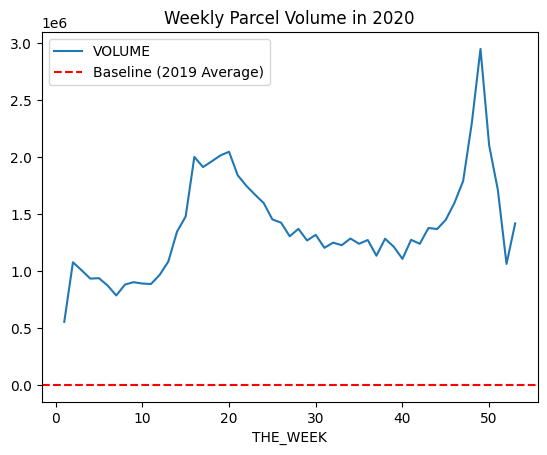

In [183]:
# Plot the weekly changes in 2020
COVID_df_2020.plot(title='Weekly Parcel Volume in 2020')
plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline (2019 Average)')
plt.legend()
plt.show()

### Draw the peak season delivery volume for 2019 & 2020

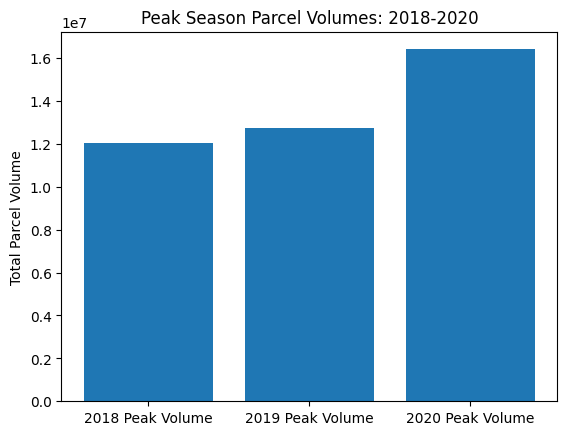

Difference of volume in peak of 2019 & 2020: 3671231


In [184]:
# Define peak season periods
peak_2018 = COVID_df[(COVID_df['THE_YEAR'] == 2018) & (COVID_df['THE_WEEK'].between(45, 53))]
peak_2019 = COVID_df[(COVID_df['THE_YEAR'] == 2019) & (COVID_df['THE_WEEK'].between(45, 53))]
peak_2020 = COVID_df[(COVID_df['THE_YEAR'] == 2020) & (COVID_df['THE_WEEK'].between(45, 53))]

# Compare peak season totals
peak_comparison = {
    '2018 Peak Volume': peak_2018['VOLUME'].sum(),
    '2019 Peak Volume': peak_2019['VOLUME'].sum(),
    '2020 Peak Volume': peak_2020['VOLUME'].sum()
}

# Bar chart comparison
plt.bar(peak_comparison.keys(), peak_comparison.values())
plt.title('Peak Season Parcel Volumes: 2018-2020')
plt.ylabel('Total Parcel Volume')
plt.show()

print('Difference of volume in peak of 2019 & 2020: {}'.format(peak_2020['VOLUME'].sum()-peak_2019['VOLUME'].sum()))

In [185]:
# Define a function to categorize based on 2019 volume delivery values
def categorize_customer(vol):
    if vol > 500000:
        return 'Enterprise'
    elif vol > 200000:
        return 'Large'
    elif vol > 10000:
        return 'Medium'
    else:
        return 'Small'

In [186]:
covid_df_2019 = COVID_df[COVID_df['THE_YEAR']==2019]
covid_df_2020 = COVID_df[COVID_df['THE_YEAR']==2020]

In [187]:
tv_2019 = covid_df_2019.groupby('FakeCustomerID')['VOLUME'].sum().reset_index()
tv_2020 = covid_df_2020.groupby('FakeCustomerID')['VOLUME'].sum().reset_index()

In [188]:
# Apply the categorization function to the total sales for 2019
tv_2019['Category'] = tv_2019['VOLUME'].apply(categorize_customer)
# Check if categorized correctly or not. 
print(tv_2019.head())

for i in tv_2019['Category'].unique():
    print('{} = {}'.format(i, len(tv_2019[tv_2019['Category']== i])))

   FakeCustomerID  VOLUME Category
0          100771    1816    Small
1          102180    5222    Small
2          102643    2670    Small
3          102750    1013    Small
4          103308   90140   Medium
Small = 860
Medium = 174
Large = 15
Enterprise = 12


#### Check for new and lost customer in 2020 compare to 2019

In [189]:
# New customers in 2020
customers_2019 = COVID_df[COVID_df['THE_YEAR'] == 2019]['FakeCustomerID'].unique()
customers_2020 = COVID_df[COVID_df['THE_YEAR'] == 2020]['FakeCustomerID'].unique()

new_customers = set(customers_2020) - set(customers_2019)
lost_customers = set(customers_2019) - set(customers_2020)

print(f"New Customers in 2020: {len(new_customers)}")
print(f"Lost Customers in 2020: {len(lost_customers)}")

New Customers in 2020: 0
Lost Customers in 2020: 15


In [190]:
# Merge the datasets based on customer_id
Categorized_COVID_df = pd.merge(COVID_df, tv_2019[['FakeCustomerID', 'Category']], on='FakeCustomerID', how='left')

### Calculate Revenue for each customer

In [191]:
########## Add a revenue column and calculate revenue with discount model
per_unit_price = 22
discount_rates = {
    'Enterprise': 0.22,
    'Large': 0.17,
    'Medium': 0.10,
    'Small': 0.04
}

# Calculate revenue
Categorized_COVID_df['Revenue'] = Categorized_COVID_df.apply(lambda row: row['VOLUME'] * per_unit_price * (1 - discount_rates[row['Category']]), axis=1)

display(Categorized_COVID_df)


,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME,Category,Revenue
0,718117,2021,1,8,Small,168.96
1,718117,2020,7,257,Small,5427.84
2,718117,2019,39,141,Small,2977.92
3,718117,2018,1,14,Small,295.68
4,718117,2021,2,192,Small,4055.04
...,...,...,...,...,...,...
190714,228893,2019,13,30,Small,633.60
190715,228893,2019,38,122,Small,2576.64
190716,228893,2019,48,99,Small,2090.88
190717,228893,2019,20,61,Small,1288.32


In [192]:
# Filter data for Week 1 to Week 15 in 2020 and 2019
pre_covid_2020 = Categorized_COVID_df[(Categorized_COVID_df['THE_YEAR'] == 2020) &
                                      (Categorized_COVID_df['THE_WEEK'] >= 1) &
                                      (Categorized_COVID_df['THE_WEEK'] <= 11)]
pre_covid_2019 = Categorized_COVID_df[(Categorized_COVID_df['THE_YEAR'] == 2019) &
                                      (Categorized_COVID_df['THE_WEEK'] >= 1) &
                                      (Categorized_COVID_df['THE_WEEK'] <= 11)]
 
pre_covid_2019

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME,Category,Revenue
9,718117,2019,5,93,Small,1964.16
21,718117,2019,4,65,Small,1372.80
49,718117,2019,6,73,Small,1541.76
90,718117,2019,3,81,Small,1710.72
97,718117,2019,11,15,Small,316.80
...,...,...,...,...,...,...
190614,811549,2019,3,5,Medium,99.00
190615,811549,2019,6,795,Medium,15741.00
190647,811549,2019,7,665,Medium,13167.00
190649,811549,2019,4,7,Medium,138.60


#### To calculate COVID observation period from w12 - w53 of 2020

In [193]:
# Filter data for Week 11 to Week 53 in 2020 and 2019
in_covid_2020 = Categorized_COVID_df[(Categorized_COVID_df['THE_YEAR'] == 2020) &
                                      (Categorized_COVID_df['THE_WEEK'] >= 12) &
                                      (Categorized_COVID_df['THE_WEEK'] <= 53)]
in_covid_2019 = Categorized_COVID_df[(Categorized_COVID_df['THE_YEAR'] == 2019) &
                                      (Categorized_COVID_df['THE_WEEK'] >= 12) &
                                      (Categorized_COVID_df['THE_WEEK'] <= 53)]

In [194]:
# Group by FakeCustomerID and calculate total volume for each group
volume_2020_grouped = in_covid_2020.groupby('Category')['VOLUME'].sum()
volume_2019_grouped = in_covid_2019.groupby('Category')['VOLUME'].sum()

print('2019 volume data group wise-', volume_2019_grouped)
print('\n2020 volume data group wise-', volume_2020_grouped)
 
print('\n\n', volume_2019_grouped.index)

2019 volume data group wise- Category
Enterprise    31978509
Large          3316328
Medium         5633737
Small          2182136
Name: VOLUME, dtype: int64

2020 volume data group wise- Category
Enterprise    46939247
Large          4849447
Medium         8404819
Small          3542374
Name: VOLUME, dtype: int64


 Index(['Enterprise', 'Large', 'Medium', 'Small'], dtype='object', name='Category')


In [195]:
j = 0
for i in volume_2019_grouped:
    growth_pc = (volume_2020_grouped[j] - volume_2019_grouped[j]) / volume_2019_grouped[j] * 100
    print('{}: {}%'.format(volume_2019_grouped.index[j], round(growth_pc, 3)))
    j+=1

Enterprise: 46.784%
Large: 46.229%
Medium: 49.187%
Small: 62.335%


C:\Users\user\AppData\Local\Temp\ipykernel_15708\1406402379.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  growth_pc = (volume_2020_grouped[j] - volume_2019_grouped[j]) / volume_2019_grouped[j] * 100


In [196]:
# Group by FakeCustomerID and calculate total revenue for each group
revenue_2020_grouped = in_covid_2020.groupby('Category')['Revenue'].sum()
revenue_2019_grouped = in_covid_2019.groupby('Category')['Revenue'].sum()
 
print('2019 Revenue data group wise-', revenue_2019_grouped)
print('\n2020 Revenue data group wise-', revenue_2020_grouped)
 
print('\n\n', revenue_2019_grouped.index)

2019 Revenue data group wise- Category
Enterprise    5.487512e+08
Large         6.055615e+07
Medium        1.115480e+08
Small         4.608671e+07
Name: Revenue, dtype: float64

2020 Revenue data group wise- Category
Enterprise    8.054775e+08
Large         8.855090e+07
Medium        1.664154e+08
Small         7.481494e+07
Name: Revenue, dtype: float64


 Index(['Enterprise', 'Large', 'Medium', 'Small'], dtype='object', name='Category')


In [197]:
j = 0
for i in revenue_2019_grouped:
    growth_pc = (revenue_2020_grouped[j] - revenue_2019_grouped[j]) / revenue_2019_grouped[j] * 100
    print('{}: {}%'.format(revenue_2019_grouped.index[j], round(growth_pc, 2)))
    j+=1

Enterprise: 46.78%
Large: 46.23%
Medium: 49.19%
Small: 62.34%


C:\Users\user\AppData\Local\Temp\ipykernel_15708\3271267468.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  growth_pc = (revenue_2020_grouped[j] - revenue_2019_grouped[j]) / revenue_2019_grouped[j] * 100


### Calculate the ISGR

In [198]:
# Filter data for Week 1 to Week 15 in 2020 and 2019
pre_covid_2020 = COVID_df[(COVID_df['THE_YEAR'] == 2020) & (COVID_df['THE_WEEK'] >= 1) & (COVID_df['THE_WEEK'] <= 15)]
pre_covid_2019 = COVID_df[(COVID_df['THE_YEAR'] == 2019) & (COVID_df['THE_WEEK'] >= 1) & (COVID_df['THE_WEEK'] <= 15)]

# Calculate total parcel volumes for each period
volume_2020 = pre_covid_2020['VOLUME'].sum()
volume_2019 = pre_covid_2019['VOLUME'].sum()

# Calculate the Industry Standard Growth Rate (ISGR)
ISGR = ((volume_2020 - volume_2019) / volume_2019) * 100

# Print the results
print(f"Volume 2020: {volume_2020}")
print(f"Volume 2019: {volume_2019}")
print(f"ISGR: {ISGR:.2f}%")


Volume 2020: 14619017
Volume 2019: 13122816
ISGR: 11.40%


### Calculate each customer's growth rate & label them as "High", "Stable" or "Declining" comparing with ISGR

In [199]:
# Merge the datasets on 'Customer_ID'
df_merged = pd.merge(tv_2019, tv_2020, on='FakeCustomerID', how='left')

# Calculate the growth rate for each customer
df_merged['Growth_Rate'] = ((df_merged['VOLUME_y'] - df_merged['VOLUME_x']) / df_merged['VOLUME_x']) * 100

# Display the results
print(df_merged)#[['FakeCustomerID'), 'Growth_Rate']])

      FakeCustomerID  VOLUME_x Category  VOLUME_y  Growth_Rate
0             100771      1816    Small    1789.0    -1.486784
1             102180      5222    Small    4817.0    -7.755649
2             102643      2670    Small    1703.0   -36.217228
3             102750      1013    Small     405.0   -60.019743
4             103308     90140   Medium  103700.0    15.043266
...              ...       ...      ...       ...          ...
1056          994361      2608    Small    1658.0   -36.426380
1057          994762      1073    Small     350.0   -67.381174
1058          995173      1632    Small    4920.0   201.470588
1059          999141      3364    Small    3619.0     7.580262
1060          999362      3561    Small    4331.0    21.623140

[1061 rows x 5 columns]


In [200]:
# Function to label the growth rate as 'low', 'medium', or 'high'
def label_growth_rate(value):
    if value > ISGR:
        return 'High'
    elif value < ISGR and value > 0:
        return 'Stable'
    else:
        return 'Declining'

# Apply the function to create a new column 'growth_label'
df_merged['Growth_Category'] = df_merged['Growth_Rate'].apply(label_growth_rate)

print(df_merged)

      FakeCustomerID  VOLUME_x Category  VOLUME_y  Growth_Rate Growth_Category
0             100771      1816    Small    1789.0    -1.486784       Declining
1             102180      5222    Small    4817.0    -7.755649       Declining
2             102643      2670    Small    1703.0   -36.217228       Declining
3             102750      1013    Small     405.0   -60.019743       Declining
4             103308     90140   Medium  103700.0    15.043266            High
...              ...       ...      ...       ...          ...             ...
1056          994361      2608    Small    1658.0   -36.426380       Declining
1057          994762      1073    Small     350.0   -67.381174       Declining
1058          995173      1632    Small    4920.0   201.470588            High
1059          999141      3364    Small    3619.0     7.580262          Stable
1060          999362      3561    Small    4331.0    21.623140            High

[1061 rows x 6 columns]


In [201]:
########## Find what % of each customer group is growing, moderately growing, and declining during the COVID observation period 

# Count the occurrences of each combination of Category and Growth category
counts = df_merged.groupby(['Category', 'Growth_Category']).size()

# Calculate the total count of records
category_totals = tv_2019.groupby('Category').size()

percentages = round((counts / category_totals) * 100, 2)
print(percentages)


Category    Growth_Category
Enterprise  Declining          33.33
            High               66.67
Large       Declining          26.67
            High               60.00
            Stable             13.33
Medium      Declining          42.53
            High               51.15
            Stable              6.32
Small       Declining          38.37
            High               54.30
            Stable              7.33
dtype: float64
